# 1. Importação e setup

In [18]:
import pandas as pd
import numpy as np
from pathlib import Path
import sys
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
notebook_path = Path.cwd()
project_root = notebook_path.parent
sys.path.append(str(project_root))

In [20]:
# Importando classes de análise
from src.eda.temporal_analysis import TemporalAnalysis
from src.eda.spatial_analysis import SpatialAnalysis
from src.eda.severity_analysis import SeverityAnalysis
from src.eda.correlation_analysis import CorrelationAnalysis
from src.eda.visualization import AccidentVisualizer

In [21]:
def load_data():
  data_path = Path("../data/processed/datatran_merged.csv")
  return pd.read_csv(data_path, sep=";")

In [22]:
df = load_data()
visualizer = AccidentVisualizer()

#### Analise temporal

In [23]:
temporal = TemporalAnalysis(df)

#### Acidentes por ano

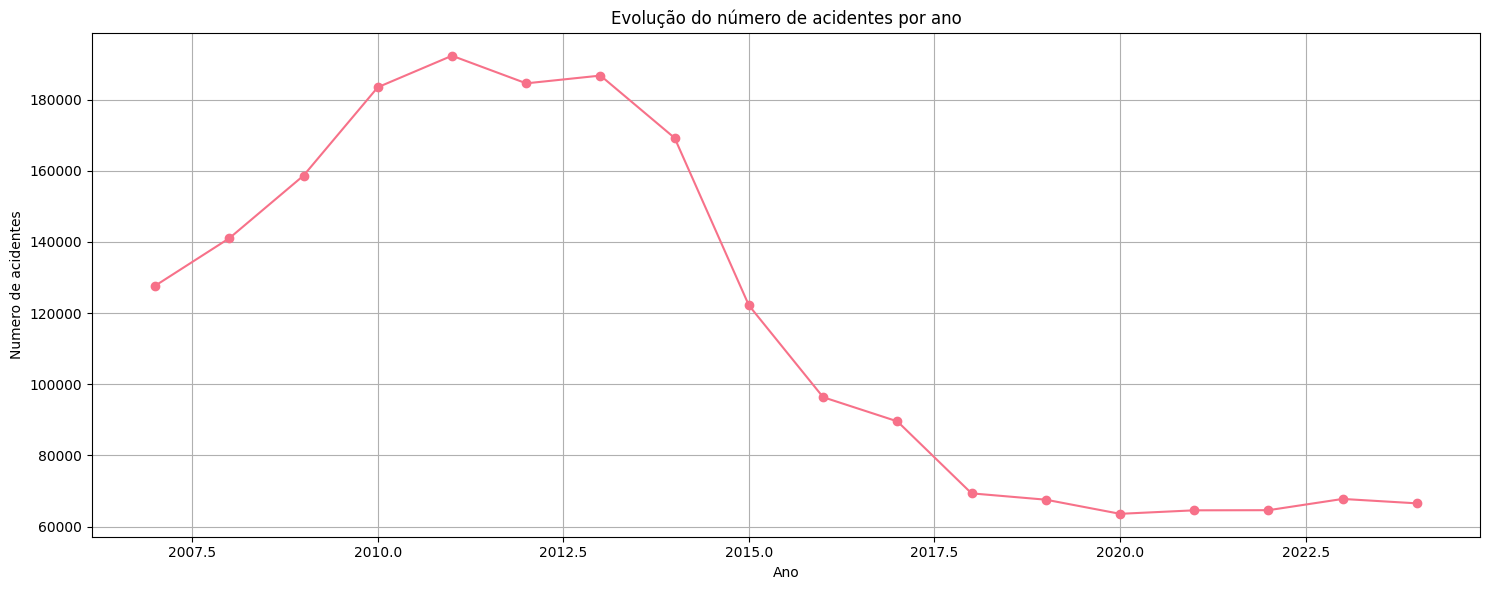

In [24]:
estatisticas_anuais = temporal.get_yearly_stats()
visualizer.plot_time_series(
  estatisticas_anuais['id'],
  'Evolução do número de acidentes por ano',
  'Ano',
  'Numero de acidentes'
)

#### Análise Espacial

In [25]:

spatial = SpatialAnalysis(df)

#### Estados com mais acidentes

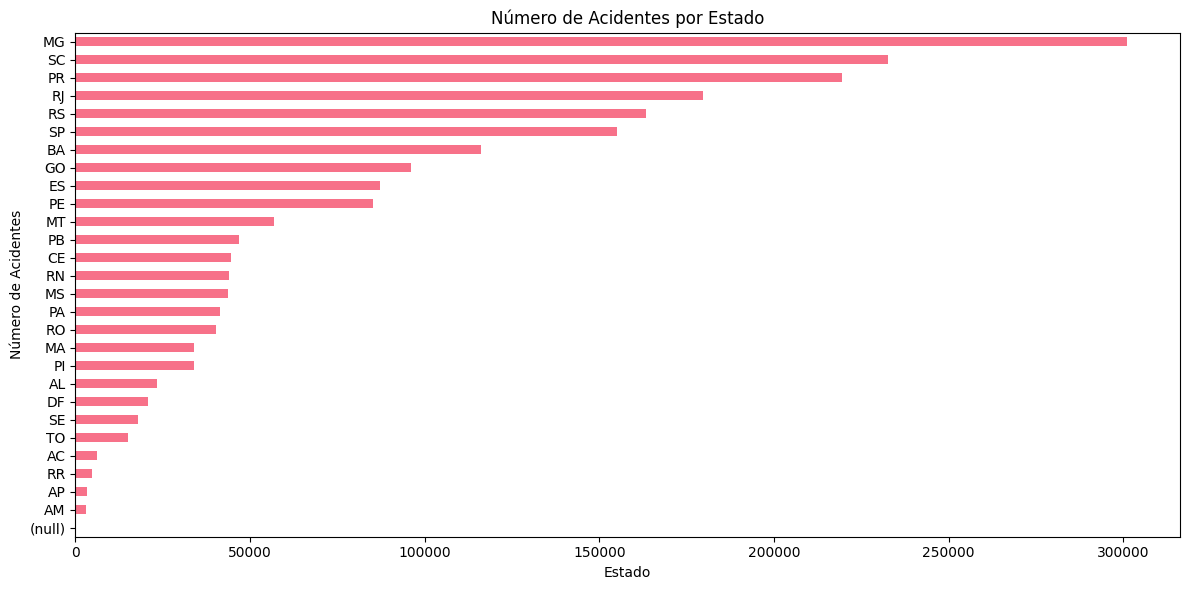

In [26]:
state_stats = spatial.get_state_stats()
visualizer.plot_bar_chart(
    state_stats[('id', 'count')].sort_values(ascending=True),
    'Número de Acidentes por Estado',
    'Estado',
    'Número de Acidentes',
    horizontal=True
)

#### Rodovias com mais acidentes

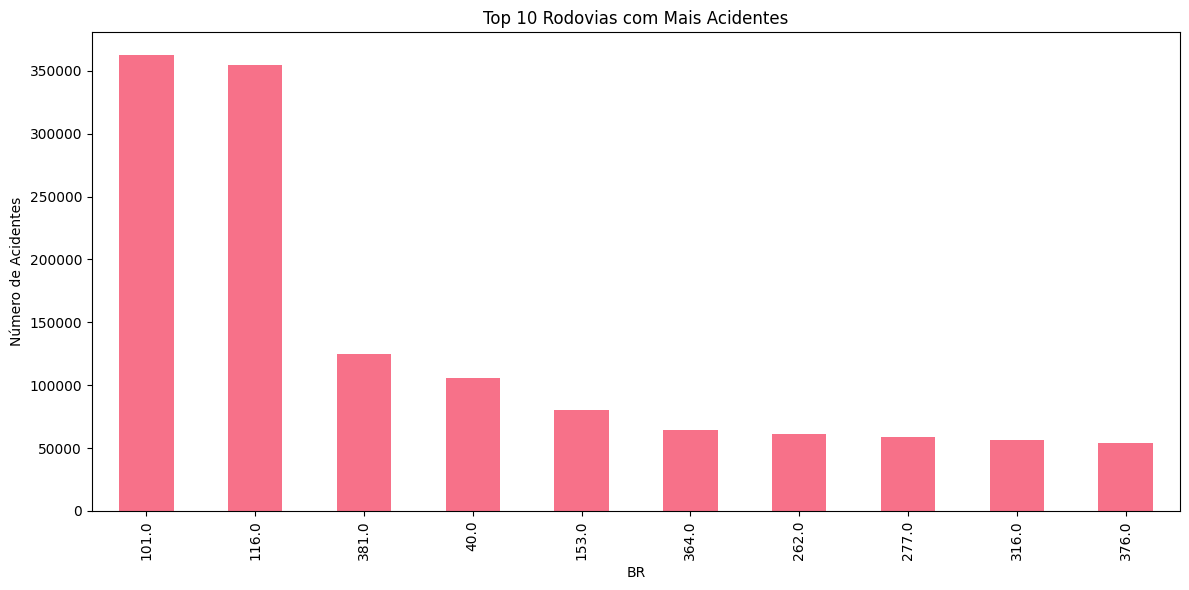

In [27]:
highway_stats = spatial.get_highway_stats()
visualizer.plot_bar_chart(
    highway_stats[('id', 'count')].head(10),
    'Top 10 Rodovias com Mais Acidentes',
    'BR',
    'Número de Acidentes'
)

#### Análise de Correlações

In [28]:
correlation = CorrelationAnalysis(df)

#### Corelação entre variaveis numericas

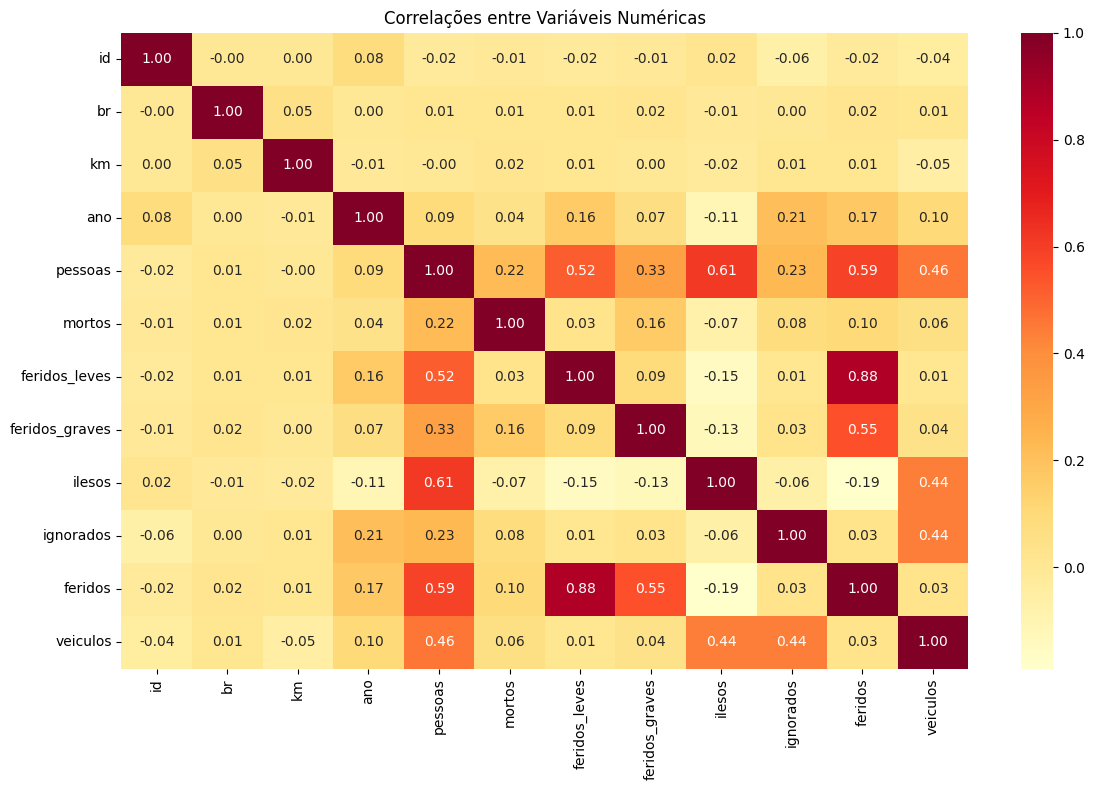

In [29]:
numeric_corr = correlation.get_numeric_correlations()
visualizer.plot_heatmap(
    numeric_corr,
    'Correlações entre Variáveis Numéricas'
)


#### Análises Específicas

#### Relação entre condições meteorológicas e severidade

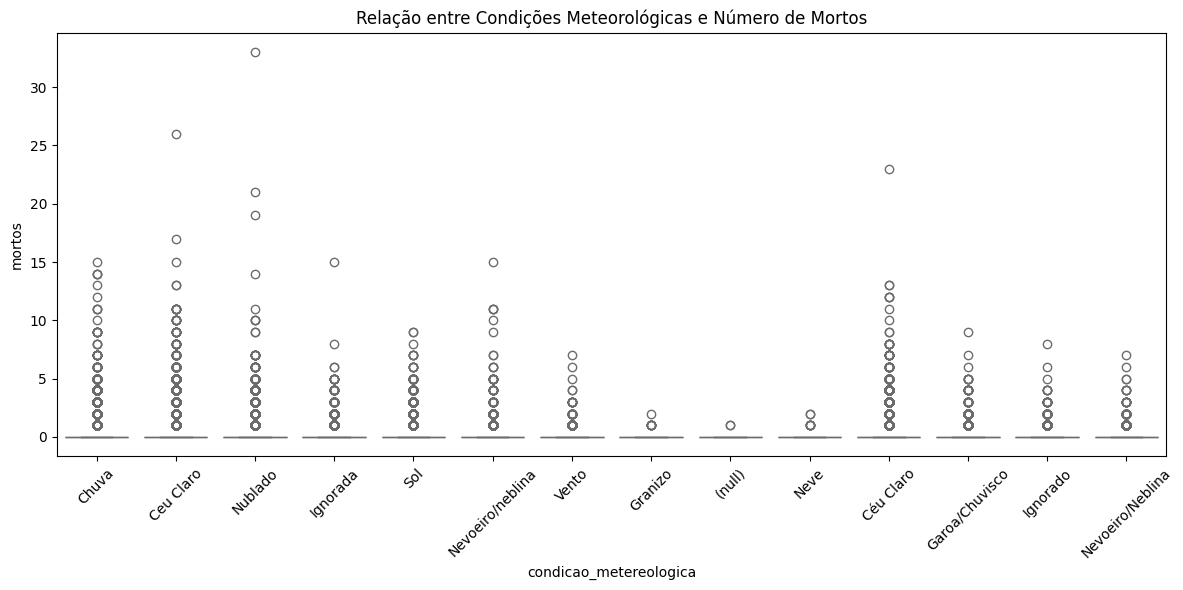

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='condicao_metereologica', y='mortos')
plt.xticks(rotation=45)
plt.title('Relação entre Condições Meteorológicas e Número de Mortos')
plt.tight_layout()

#### Tipos de acidentes mais comuns por período do dia

<Figure size 1500x800 with 0 Axes>

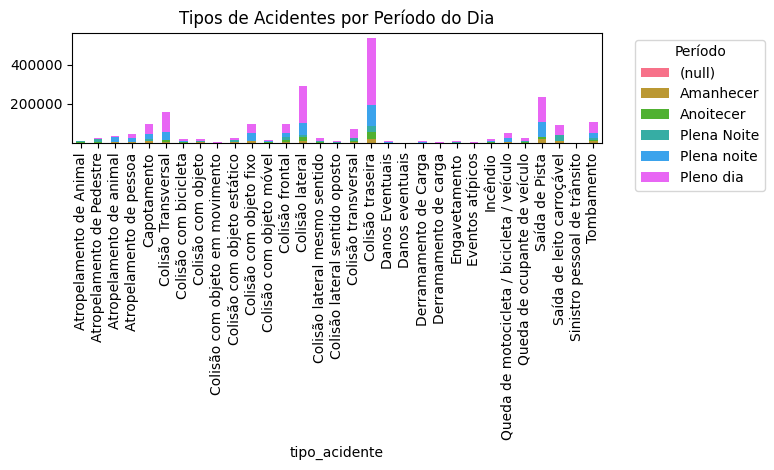

In [31]:
plt.figure(figsize=(15, 8))
pd.crosstab(df['tipo_acidente'], df['fase_dia']).plot(kind='bar', stacked=True)
plt.title('Tipos de Acidentes por Período do Dia')
plt.legend(title='Período', bbox_to_anchor=(1.05, 1))
plt.tight_layout()